# Text Visualization using crawling data text instagram Nevertoolavish

In [1]:
# Load library
import numpy as np
import csv
import re
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
from IPython.display import Image as im
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

In [2]:
# load Data
row_data = []
with open('nevertoolavishs.csv', 'r', encoding='utf-8') as csvFile:
    read = csv.reader(csvFile)
    for row in read:
        row_data.append(row)
csvFile.close()

In [9]:
# row_data

In [4]:
# Clean all the data
# Load default Stopword
stop_factory = StopWordRemoverFactory()
more_stopword = ['kalian', 'banyak', 'guys', 'sih', 'keren', 'gak', 'ada', 'gua', 'yang', 'nih']
 
# Add new Stopword
data = stop_factory.get_stop_words()+more_stopword
stopword = stop_factory.create_stop_word_remover()
 
raw_string = ' '.join(map(str, row_data))
no_links = re.sub(r'@\S+', '', raw_string)
no_unicode = re.sub(r"\\[a-z][a-z]?[0-9]+", '', no_links)
no_special_characters = re.sub('[^A-Za-z ]+', '', no_unicode)
stop = stopword.remove(no_special_characters)

In [5]:
words = stop.split(" ")
words = [w for w in words if len(w) > 2]  # ignore a, an, be, ...
words = [w.lower() for w in words]
words = [w for w in words if w not in STOPWORDS]

In [6]:
# Load img for masking text
mask = np.array(Image.open('sneakers.png'))

In [7]:
# pre ploting
wc = WordCloud(background_color="white", max_words=2000, mask=mask)
clean_string = ','.join(words)
wc.generate(clean_string)

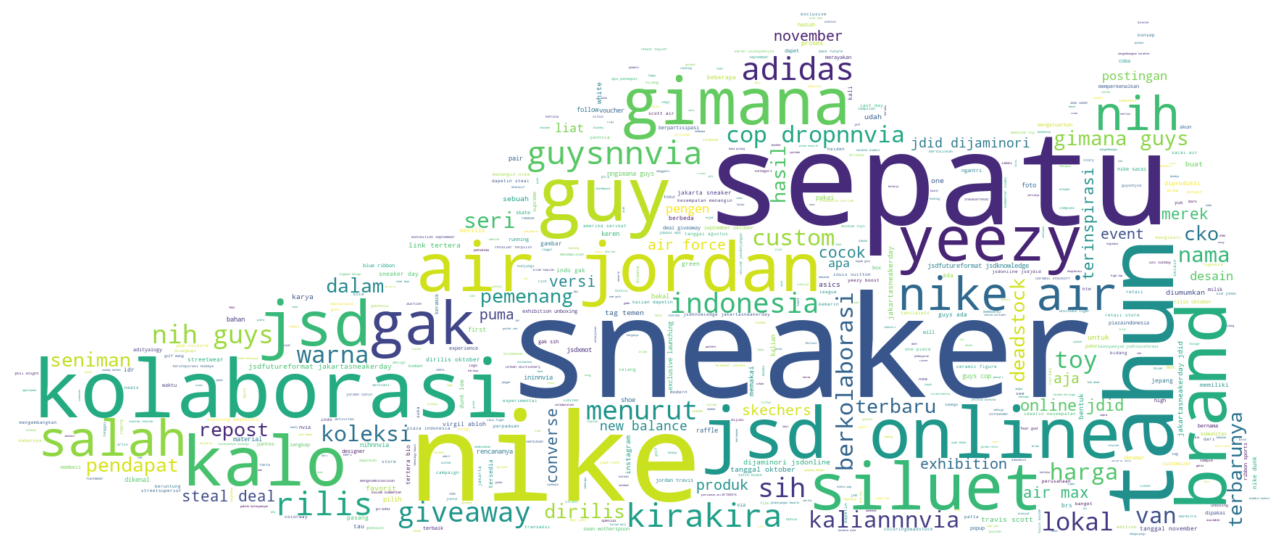

In [8]:
#Ploting or Visualization
f = plt.figure(figsize=(50,50))
# f.add_subplot(1,2, 1)
# plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear')
# plt.title('Original Stencil', size=40)
# plt.axis("off")
f.add_subplot(1,2, 2)
plt.imshow(wc, interpolation='bilinear')
plt.title('', size=40)
plt.axis("off")
plt.show()